# **Homework 2:** Priors, regularization, and shrinkage
STATS348, UChicago, Spring 2024

----------------
**Your name here:**

Alex Huang

----------------

<a href="https://colab.research.google.com/github/aschein/stat_348_2024/blob/main/assignments/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Instructions

The purpose of this homework is apply the ideas from lectures 3 and 4 on regularizers, priors, and shrinkage.

Please fill out your answers in the provided spaces below. When you are finished, export the notebook as a PDF, making sure that all of your solutions are clearly visible.

Assignment is due **Saturday April 6, 11:59pm** on GradeScope.

----

## **Problem 1:** Regularization and Priors
              
Consider a standard regression setting with fixed design $X\in\mathbb{R}^{n\times p}$ and
$$
    y=X\beta+\varepsilon
$$
where $\varepsilon\sim\mathcal{N}(0,\sigma^2 I_p)$ for variance $\sigma^2$ considered known and fixed.

The **elastic net criterion** is a regularized loss function defined as $\ell_\mathrm{EN}(\lambda_1,\lambda_2,\beta)=\|y-X\beta\|_2^2 + \lambda_1\|\beta\|_1+\lambda_2\|\beta\|_2^2$, and the **elastic net estimator** is defined as its minimizer:
$$
\widehat{\beta}^\textrm{EN}(\lambda_1,\lambda_2):=\underset{\beta}{\textrm{argmin}} \,\, \ell_\mathrm{EN}(\lambda_1,\lambda_2,\beta)
$$
In lecture, we saw a correspondence between Ridge and LASSO estimators with MAP estimates under normal and Laplace priors, respectively. 

----
- **1a)** Provide the form **up to proportionality** of a prior density $P(\beta)$ on the regression coefficients such that the MAP estimate under $P(\beta)$ corresponds to $\widehat{\beta}^\mathrm{EN}(\lambda_1,\lambda_2)$. In the space below, please state $P(\beta)$ clearly, and provide a brief justification. 

$$P(\beta) \propto_{\beta} \textrm{Your answer here}$$

[Your justification here]


$$P(\beta) \propto_{\beta} \exp\left(-\frac{1}{2\sigma^2}\|\beta\|_2^2 - \lambda_1\|\beta\|_1 - \lambda_2\|\beta\|_2^2\right)$$

This choice of prior is proportional to an exponential term that penalizes both the L1 and L2 norms of the coefficients. The penalty terms $\lambda_1\|\beta\|_1$ and $\lambda_2\|\beta\|_2^2$ mimic the regularization terms in the elastic net criterion, while the term $\frac{1}{2\sigma^2}\|\beta\|_2^2$ corresponds to a Gaussian prior with precision parameter $\sigma^2$ on the coefficients, similar to Ridge regression. Therefore, the MAP estimate under this prior corresponds to the elastic net estimator.
----

- **1b)** Consider a dataset where the input feature $x$ is generated from a uniform distribution over the interval $[-3,3]$, and the corresponding target $y$ is generated as
$$y_i=2x_i^3 - x_i^2 + \varepsilon_i$$
where $\varepsilon_i\sim\mathcal{N}(0,10)$ is a noise term (with _variance_ 10). Use the code block below to simulate a dataset of $n=20$ data points in Python.

In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

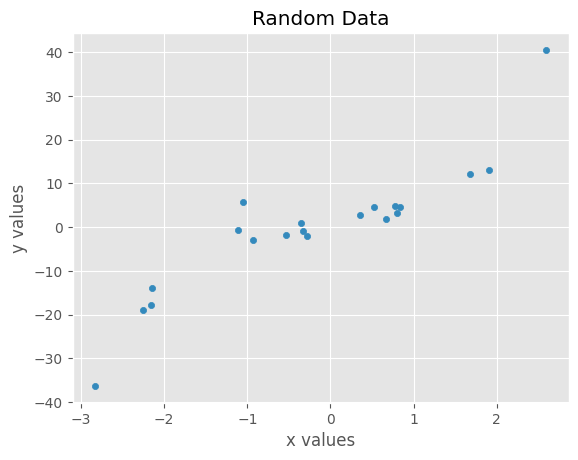

In [15]:
# Your code here

n = 20
x = np.random.rand(n) * 6 - 3
epsilon = np.random.normal(0, np.sqrt(10), size=n)
# epsilon
y = 2 * x ** 3 + x ** 2 + epsilon

data = pd.DataFrame({'x': x, 'y': y})
data.plot.scatter(x='x', y='y', xlabel='x values', ylabel='y values', title='Random Data')
plt.show()

---
Now consider the following model of the data using a 5th degree polynomial regression. 
$$y_i=\beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \ldots + \beta_5 x_i^5 + \varepsilon_i$$
where the noise is assumed $\varepsilon_i \sim \mathcal{N}(0,1)$ (with _variance_ 1).
- **1c)**  Estimate the coefficients using maximum likelihood as $\widehat{\beta}^\mathrm{MLE}$. In the code block below, do this programmatically using scikit-learn's [PolynomialFeatures preprocessor](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). (You may have to import other methods/libraries as well.)

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from IPython.display import Markdown

# Your code here
poly_model = PolynomialFeatures(degree=5)
x_poly = poly_model.fit_transform(x.reshape((-1,1)))

lr_model = LinearRegression()
lr_model.fit(x_poly, y)

result = "The following output are the betas to the 5th degree polynomial regression:\n"
result += "\\begin{align*}"
for i in range(6):
    result += f"\\beta_{i} &= {lr_model.coef_[i]:.4f} \\\\"
result += "\\end{align*}"
display(Markdown(result))

The following output are the betas to the 5th degree polynomial regression:
\begin{align*}\beta_0 &= 0.0000 \\\beta_1 &= 1.4799 \\\beta_2 &= -0.2887 \\\beta_3 &= 1.1824 \\\beta_4 &= 0.1427 \\\beta_5 &= 0.0804 \\\end{align*}

----
Now, consider a prior of $\beta\sim\mathcal{N}(0,\sigma_0^2)$ on the regression coefficients. 

- **1d)**: Provide the form of the MAP solution  $\widehat{\beta}^{\textrm{MAP}}(\sigma_0^2)$ below:

$$\widehat{\beta}^{\textrm{MAP}}(\sigma_0^2) = $$


---

The Maximum A Posteriori (MAP) solution for the regression coefficients given a prior of $\beta \sim \mathcal{N}(0,\sigma_0^2)$ can be obtained by combining the likelihood function with the prior distribution.

Given the likelihood function $P(y|X,\beta)$ and the prior distribution $P(\beta)$, the MAP solution $\widehat{\beta}^{\textrm{MAP}}$ is obtained by maximizing the posterior distribution $P(\beta|y,X)$, which is proportional to the product of the likelihood and the prior.

Since the likelihood function follows a Gaussian distribution and the prior is also Gaussian, the posterior distribution will be Gaussian as well, and the MAP solution can be obtained analytically. The MAP estimate of $\beta$ is the mean of the posterior distribution, which is given by the formula:

$$\widehat{\beta}^{\textrm{MAP}}(\sigma_0^2) = \left(X^TX + \frac{\sigma^2}{\sigma_0^2}I\right)^{-1}X^Ty$$

where:
- $X$ is the design matrix,
- $y$ is the vector of observations,
- $\sigma^2$ is the variance of the error term in the likelihood function,
- $\sigma_0^2$ is the variance of the prior distribution,
- $I$ is the identity matrix.

This formula combines the information from the data (given by $X$ and $y$) with the prior knowledge (controlled by the parameter $\sigma_0^2$).

---
- **1e)** In the code block below, implement the MAP estimator for a given $\sigma_0^2$ (using any methods or libraries you like):



In [1]:
def map_estimate(y, X, sigma0):
    # Your code here
    return beta_map

----

- **1f)** Fit the MAP estimate to the synthetic data you generated above, experimenting with different values for $\sigma_0^2$. Find a value that seems "too large", a value that seems "too small", and a value that seems "just right" based on plotting and inspecting the learned regression functions. (These judgements are subjective, we are not expecting specific values, just reasonable ones.)  Once you have selected three values, display clearly in a single plot the following:

    - The dataset $(x_1,y_1),\ldots,(x_{20},y_{20})$

    - The estimated regression function using using $\widehat{\beta}_\mathrm{MLE}$
 
    - The three estimated regression functions $\widehat{\beta}^{\textrm{MAP}}(\sigma_0^2)$ for the selected three values of $\sigma_0^2$

    Make sure your plot includes a legend that clearly indicates the different functions.




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your code here

--- 
- **1g)** Discuss your findings plot above.

    - How does the MLE compare to the three different MAP solutions?
    
    - Why did you select the three values of $\sigma_0^2$ that you did? 


Your answer here

--- 

## **Problem 2:** Estimating SEPs with binomial trials

#### **Setting**

It is May 1968 and the USS _Scorpion_ has just disappeared somewhere in the Atlantic Ocean, likely off the coast of Spain. You are the lone statistician on board the USS _Mizar_, which has been dispatched to find the missing submarine. Your job is to guide the search as best you can, given the data at your disposal.

#### **Search effectiveness probability (SEP)**
As we saw in lecture, an important component of our decision problem is the _search effectiveness probability_ of each search cell $k$

\begin{equation}
q_k = P(\textrm{finding the sub in $k$} \mid \textrm{sub is in $k$ and the divers search $k$})
\end{equation}

#### **Binomial trials**
To collect data that we can use to estimate these SEPs, our divers have been running trials to see if they can recover large objects thrown overboard in each cell $k$. Define the following quantity:
\begin{align}
y_k &\in \{0,\dots, n_k\}&\textrm{ the number of successful trials in $k$}
\end{align}

where $n_k$ is the total number of trials in $k$.
We will assume the following likelihood for $y_k$ given the SEP $q_k$:
\begin{align}
y_k &\stackrel{\textrm{ind.}}{\sim} \textrm{Binom}(n_k,\, q_k) \textrm{ for cell } k = 1\dots K
\end{align}

#### **Beta prior**
Now further assume the following prior for the SEPs:
\begin{align}
q_k &\stackrel{\textrm{iid}}{\sim} \textrm{Beta}(a_0,\,b_0) \textrm{ for cell } k = 1\dots K
\end{align}
where $a_0$ and $b_0$ are the Beta prior's shape parameters.


----

- **2a):** Provide an analytic expression (i.e., without any integrals) for the negative log marginal likelihood $-\log P(\boldsymbol{y}_{1:K} \mid \boldsymbol{n}_{1:K}, a_0,\,b_0\,)$ where $\boldsymbol{y}_{1:K}\equiv (y_{1},\dots,y_{K})$ and $\boldsymbol{n}_{1:K}\equiv (n_{1},\dots,n_{K})$ are the data across all cells. Provide your answer below, along with a brief justification.

\begin{equation}
-\log P(\boldsymbol{y}_{1:K} \mid \boldsymbol{n}_{1:K}, a_0,\,b_0\,) = \textrm{ Your answer here }
\end{equation}

----

- **2b):** In the code cell below, implement a function that takes in two arrays for $\boldsymbol{y}_{1:K}$ and $\boldsymbol{n}_{1:K}$, along with a value of the parameters $(a_0, b_0)$, and computes the negative marginal log likelihood. We recommend you use functions in the `numpy` and/or `scipy` Python libraries, but you may use any other libraries if you like.

In [5]:
import numpy as np
import scipy.stats as st    # for stats-related methods
import scipy.special as sp  # for special functions (e.g., gammaln)

def neg_log_marginal_likelihood(params, y, n):
    """ Calculate the negative log-marginal likelihood for the beta-binomial model.
    
    Args:
        params (tuple): the parameters of the marginal likelihood (a0, b0)
        y (array): the number of successes for each trial
        n (array): the number of trials
    
    Returns:
        float: the negative log-marginal likelihood
    """
    a0, b0 = params
    
    # Your code here
    
    return neg_log_marginal_likelihood

----

- **2c):** Now, in the code cell below, implement a method for fitting the parameters $(a_0, b_0)$ which relies on your implementation of the negative log marginal likelihood. We recommend using `scipy.optimize.minimize` (make sure to read [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) and to experiment with different settings). You are allowed to use other methods and libraries, if you so choose.

In [6]:
from scipy.optimize import minimize

def fit_marginal_likelihood(y, n):
    """ Fit the parameters of the marginal likelihood to the data.

    Args:
        y (array): the number of successes for each trial
        n (array): the number of trials

        If your function requires other input arguments, include a description here.
    
    Returns:
        tuple: the MLE for a0 and b0
    """

    # Your code here

    return a0_mle, b0_mle

----

- **2d):** Use your method to fit $a_0$ and $b_0$ to the trial data. In the cell below, load in the trial data and call your method. 

In [ ]:
# load in the beta-binomial trial data
import pandas as pd
df_trials = pd.read_csv('binomial_trials.csv')
y = df_trials['n_successes'].values
n = df_trials['n_trials'].values

# if your fit_marginal_likelihood function takes extra args, modify this code to pass them in here.
a0_mle, b0_mle = fit_marginal_likelihood(y, n)

print(a0_mle, b0_mle)

----

- **2e):** This is an empirical Bayes procedure that can be loosely understood as "fitting the prior". In the code cell below, create a plot that visualizes the the PDF of the "fitted" Beta prior---i.e., $\textrm{Beta}(q;\, \widehat{a}_0\,\widehat{b}_0)$.

In [1]:
# Your code here

---
- **2f)**: In the code cell below, use your fitted parameters $(\widehat{a}_0, \widehat{b}_0)$ to compute the posterior means of all $K$ SEPs $$\widehat{q}^{\textrm{post-mean}}_k = \mathbb{E}[q_k \mid y_k, n_k, \widehat{a}_0, \widehat{b}_0]$$
    and compare them to the maximum likelihood estimates $$\widehat{q}^{\textrm{MLE}}_k = \underset{q_k}{\textrm{argmax}}\, P(y_k \mid n_k, q_k)$$.
    More specifically:
    
    - Compute the posterior means.

    - Compute the maximum likelihood estimates.
    
    - Generate a scatter plot where each $(x,y)$ point is a pair $(\widehat{q}^{\textrm{MLE}}_k, \widehat{q}^{\textrm{post-mean}}_k)$ for all $k=1\dots K$. For reference, also include the line $x=y$, and make sure the $x$- and $y$-axis both range over the full set of possible values.


In [ ]:
# Your code here

----

- **2f)**: Discuss the plot you just generated.

    - What is the relationship between the maximum likelihood estimates and the posterior means?

    - Why does this make sense based on your understanding of the procedure you have implemented?

    - Comment on any other observations or insights.

Your answer here.